Imports

In [115]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Importing the Data Set

In [116]:
raw_data = pd.read_excel('autompg.xlsx')

Deviding the Data Into Input(X) & Output(Y) Values

In [117]:
x = raw_data.drop(columns=['MPG', 'Name'])
y = raw_data['MPG']

Splitting our Data Set into Training Data and Test Data

In [118]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

Building and Training the Model

In [119]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train.values, y_train.values)

LinearRegression()

Making Predictions From Our Model

In [120]:
y_pred = model.predict(x_test.values)

Calculating the Average of the MPG

In [109]:
mean_mpg = y.mean()

Classifying the Values ​Above and Below the Average

In [110]:
y_test_classified = y_test > mean_mpg
y_pred_classified = y_pred > mean_mpg

Displaying the Accuracy Percentage and the Classification Report

In [126]:
print("Accuracy:", accuracy_score(y_test_classified, y_pred_classified))
print("Classification Report:\n", classification_report(y_test_classified, y_pred_classified))

Accuracy: 0.8728813559322034
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.82      0.88        66
        True       0.80      0.94      0.87        52

    accuracy                           0.87       118
   macro avg       0.88      0.88      0.87       118
weighted avg       0.88      0.87      0.87       118



Displaying the Linear Line Graph Generated From the Model

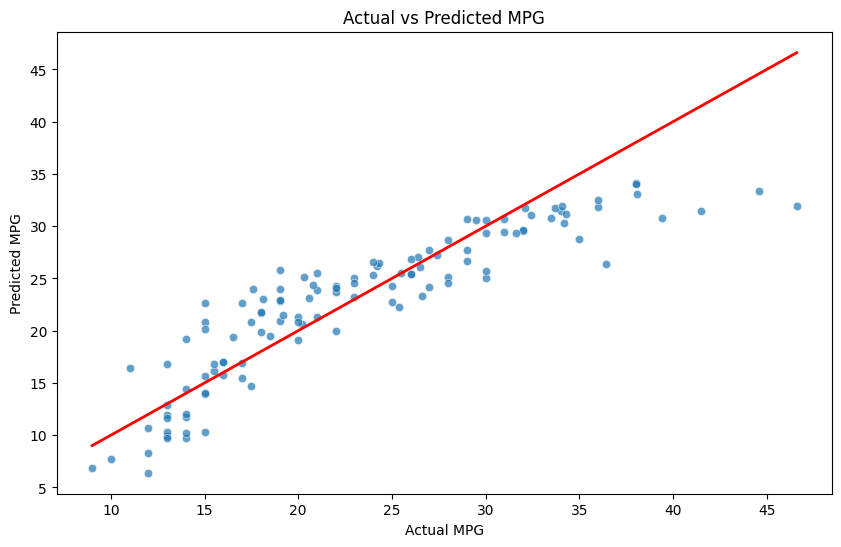

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.show()

Get Input From the User and Return a Classification and the Probability of That Classification

In [127]:
def predict_user_input():
    user_input = []
    for column in x.columns:
        value = float(input(f"Enter the value for {column}: "))
        user_input.append(value)
    user_input = np.array(user_input).reshape(1, -1)
    user_pred = model.predict(user_input)
    user_pred_classified = user_pred > mean_mpg
    print("Accuracy:", accuracy_score(y_test_classified, y_pred_classified))
    print(f"Predicted MPG: {user_pred[0]}")
    print(f"Classification: {'Above Average' if user_pred_classified else 'Below Average'}")

Calling the Function

In [128]:
predict_user_input()

Accuracy: 0.8728813559322034
Predicted MPG: 18.13051507788396
Classification: Below Average
